# Linear Regression Model with the basic data set
***
## Import Packages

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv')

In [56]:
test = pd.read_csv('../data/test.csv')

In [5]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [12]:
train.dtypes

Id                  int64
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [94]:
train["Date"] = train["Date"].apply(lambda x: x.replace("-",""))
train["Date"]  = train["Date"].astype(int)

In [123]:
features = ['Lat', 'Long', 'Date', 'Fatalities']

In [124]:
X = train[features]
y1 = train['ConfirmedCases']
# y2 = train['Fatalities']

In [125]:
X.shape

(17040, 4)

In [126]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=18)

In [127]:
lr_cc = LinearRegression() # instantiating model
lr_cc.fit(X_train, y1_train) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## R2 Scores

In [128]:
# Train score, default score is R2
train_cc_r2 = lr_cc.score(X_train, y1_train)
train_cc_r2

0.913954925760687

In [129]:
# Test score
test_cc_r2 = lr_cc.score(X_test, y1_test)
test_cc_r2

0.9141695785697896

In [130]:
# Cross Val Score
cv_cc_r2 = cross_val_score(lr_cc, X_train, y1_train, cv=5).mean()
cv_cc_r2

0.9181607869995274

## RMSE scores

In [131]:
predictions_cc_train = lr_cc.predict(X_train)

In [132]:
predictions_cc_test = lr_cc.predict(X_test)

In [133]:
# RMSE
train_cc_rmse = np.sqrt(mean_squared_error(y1_train, predictions_cc_train))
train_cc_rmse

994.28538433596

In [134]:
# RMSE
test_cc_rmse = np.sqrt(mean_squared_error(y1_test, predictions_cc_test))
test_cc_rmse

906.6009598953377

In [135]:
y_preds_cc = lr_cc.predict(X)

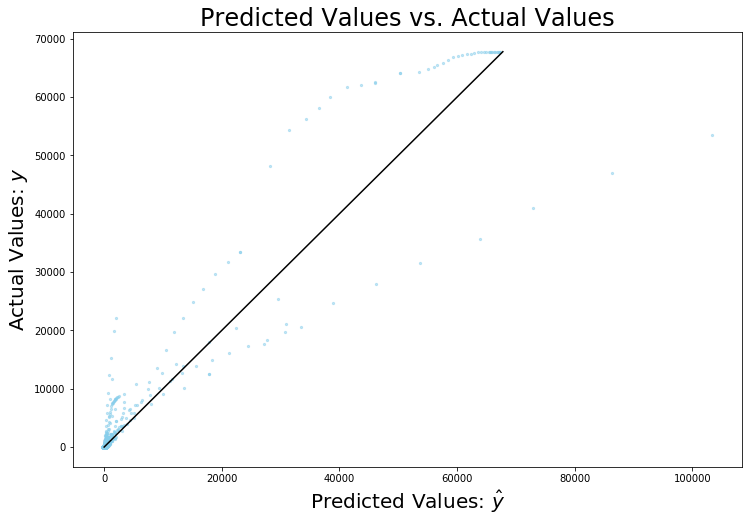

In [136]:
# Plot the model
plt.figure(figsize=(12,8))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds_cc, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

## Try model on Kaggle test data

In [86]:
test

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0000,65.0000,2020-03-12
1,2,NaN,Afghanistan,33.0000,65.0000,2020-03-13
2,3,NaN,Afghanistan,33.0000,65.0000,2020-03-14
3,4,NaN,Afghanistan,33.0000,65.0000,2020-03-15
4,5,NaN,Afghanistan,33.0000,65.0000,2020-03-16
...,...,...,...,...,...,...
12207,12208,NaN,Zambia,-15.4167,28.2833,2020-04-19
12208,12209,NaN,Zambia,-15.4167,28.2833,2020-04-20
12209,12210,NaN,Zambia,-15.4167,28.2833,2020-04-21
12210,12211,NaN,Zambia,-15.4167,28.2833,2020-04-22


In [87]:
# test['Lat'] = (test['Lat'].astype(float))

In [88]:
# test['Long'] = (test['Long'].astype(float))

In [116]:
test["Date"] = test["Date"].apply(lambda x: x.replace("-",""))
test["Date"]  = test["Date"].astype(int)

In [117]:
kaggle_features = ['Lat', 'Long', 'Date']

In [118]:
kaggle_test = test

In [120]:
features_kaggle = kaggle_test[kaggle_features]

In [121]:
# set my X variable
X_kaggle = [features_kaggle]

In [122]:
# generate predictions
y_preds_kag = lr_cc.predict(X_kaggle)

ValueError: cannot copy sequence with size 12212 to array axis with dimension 3